## 동차좌표와 어파인 변환

앞으로 설명할 이미지의 변환에 관한 수식을 이해하기 위해서는 동차좌표(Homogenous Coordinate)의 개념을 먼저 알아두어야 한다. 

#### 동차좌표는 2차원상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현하는 방법이다. 다음과 같이 마지막 원소로 1을 추가하여 만든다.

$${x} = \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$$

마지막 원소가 1이 아닌 경우에는 1로 스케일링 시킨 것과 동일한 위치를 가리킨다.

$$\begin{bmatrix} x \\ y \\ w \end{bmatrix} = \begin{bmatrix} x/w \\ y/w \\ 1 \end{bmatrix}$$

동차좌표를 사용하면 변환행렬을 곱하여 선형변환을 하고, 평행하게  𝑡=(𝑡𝑥,𝑡𝑦) 만큼 이동하는 과정

$$\begin{bmatrix}x' \\ y'\end{bmatrix} = {A}\begin{bmatrix}x \\ y\end{bmatrix} + \begin{bmatrix}t_x \\ t_y\end{bmatrix}= {A}\begin{bmatrix}x \\ y\end{bmatrix} + t$$

를 다음처럼 한번의 행렬 곱으로 나타낼 수 있기 때문에 수식 및 연산이 간단해진다. 

#### 이 수식을 이용하여 이미지를 변환하는 것을 어파인 변환이라고 한다.

$$\begin{bmatrix}x' \\ y' \\ 1\end{bmatrix}= \begin{bmatrix} {A} & {t} \\ {0} &  1\end{bmatrix}\begin{bmatrix}x \\ y \\ 1\end{bmatrix}$$

이렇게 하나의  3×3  행렬로 3차원 좌표의 변환을 할 때, 이  3×3  행렬을 사영행렬(homography matrix)이라고 부른다.

$${x'} = {H} {x}$$

## 강체변환

강체변환(rigid transform)은 유클리드 변환(Euclidean transformation)이라고도 불리우며, 회전( 𝜃 ), 이동( 𝑡 ), 두가지 요소만 사용하여 이미지를 변환한다. homography matrix는 아래와 같다.

$${H} = \begin{bmatrix} \cos\theta & -\sin\theta & t_x \\ \sin\theta & \cos\theta & t_y \\ 0 & 0 & 1 \end{bmatrix}$$

## 유사변환

유사변환(similarity transform)은 확대/축소(s), 회전( 𝜃 ), 이동( 𝑡 ), 세가지 요소를 사용하여 이미지를 변환한다. 변환행렬은 다음과 같다.

$${H} = \begin{bmatrix} s\cos\theta & -s\sin\theta & t_x \\ s\sin\theta & s\cos\theta & t_y \\ 0 & 0 & 1 \end{bmatrix}$$

아래 코드는 90도 회전을 하고, x, y축으로 각 100씩 평행이동 후 이미지 크기를 반으로 줄이는 기능을 한다.

변환행렬을 만들 때는 cv2.getRotationMatrix2D 함수를 사용한다.

입력인수는 다음과 같다.

+ center: 이미지의 중심 좌표
+ angle: 회전 시키는 각도  𝜃 (시계 반대방향)
+ scale: 변환하려는 크기 비율  𝑠 

#### 주의 할 점은 이론적으로는 사영행렬이 위 식과 같이  3×3  행렬이지만, OpenCV에서는 마지막 행을 생략하고  3×2  변환행렬을 사용할 수도 있다.

변환행렬을 실제로 이미지에 적용하여 어파인 변환을 할 때는 warpAffine 함수를 사용한다.

In [1]:
import cv2
import skimage.data

In [2]:
img_astro = skimage.data.astronaut()
img = cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)  # 색공간 변환 bgr->gray
img.shape

(512, 512)

In [6]:
rows, cols = img.shape[:2]

# 이미지 중심점을 기준으로 30도 회전, 크기는 70%
H = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.7) # 변환행렬 만들기

# 50만큼 평행이동
H[:, 2] += 50

H

array([[  0.60621778,   0.35      ,  61.20824764],
       [ -0.35      ,   0.60621778, 240.40824764]])

In [8]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

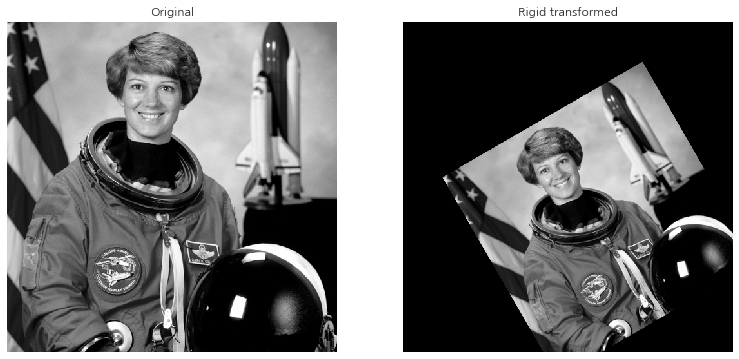

In [9]:
dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 13))
ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title("Rigid transformed")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)
plt.show()

## 3점 어파인 변환

어파인 변환에 사용되는 행렬을 지정하는데는 3점이 어떻게 변환되는지만 알면 된다. OpenCV에는 주어진 두 쌍의 3점으로부터 어파인 변환을 위한 사영행렬을 계산하는 getAffineMatrix 함수를 제공한다.

In [10]:
import scipy as sp
import scipy.misc

In [11]:
img = sp.misc.face()
rows, cols, ch = img.shape

In [12]:
rows, cols, ch

(768, 1024, 3)

In [14]:
# 두 쌍의 3점 만들기
pts1 = np.float32([[200, 200], [200, 600], [800, 200]])
pts2 = np.float32([[100, 100], [200, 500], [600, 100]])

pts_x1, pts_y1 = zip(*pts1)  
pts_x2, pts_y2 = zip(*pts2)
pts_x1, pts_y1

((200.0, 200.0, 800.0), (200.0, 600.0, 200.0))

In [15]:
# 사영행렬(H) 3 X 2 행렬 만들기 

H_affine = cv2.getAffineTransform(pts1, pts2)
H_affine

array([[ 8.33333333e-01,  2.50000000e-01, -1.16666667e+02],
       [-1.77635684e-17,  1.00000000e+00, -1.00000000e+02]])

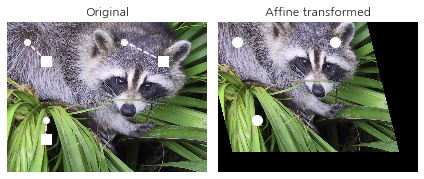

In [28]:
# 어파인 변환
img2 = cv2.warpAffine(img, H_affine, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2)

ax1.set_title("Original")
ax1.imshow(img)
ax1.scatter(pts_x1, pts_y1, c='w', s=100, marker='s')  # 3점 위치 표시
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
         list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "o--", c="w")
ax1.axis("off")

ax2.set_title("Affine transformed")
ax2.imshow(img2)
ax2.scatter(pts_x2, pts_y2, c="w", s=100)
ax2.axis("off")

plt.tight_layout()
plt.show()

## 원근변환

원근변환(perspective transform)은 핀홀 카메라(pin-hole camera) 모형을 사용하여 2차원 이미지를 변환하는 방법이다. 원근법 변환은 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환이다.

[그림] 핀홀카메라 모형 : https://datascienceschool.net/upfiles/4367342a583648f6872a1763b6412323.png

원근변환을 지정하는 데는 4점이 필요하다. OpenCV에는 주어진 두 쌍의 4점으로부터 원근변환을 위한 사영행렬을 계산하는 getPerspectiveTransform 함수를 제공한다. 실제 변환에는 warpPerspective 함수를 사용한다.

In [30]:
pts1 = np.float32([[200, 200], [200, 600], [800, 200], [800, 600]])
pts2 = np.float32([[300, 300], [300, 500], [600, 100], [700, 500]])

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[-8.43769499e-17, -7.62711864e-02,  2.59322034e+02],
       [-3.38983051e-01,  2.79661017e-01,  2.55932203e+02],
       [-6.77966102e-04, -2.54237288e-04,  1.00000000e+00]])

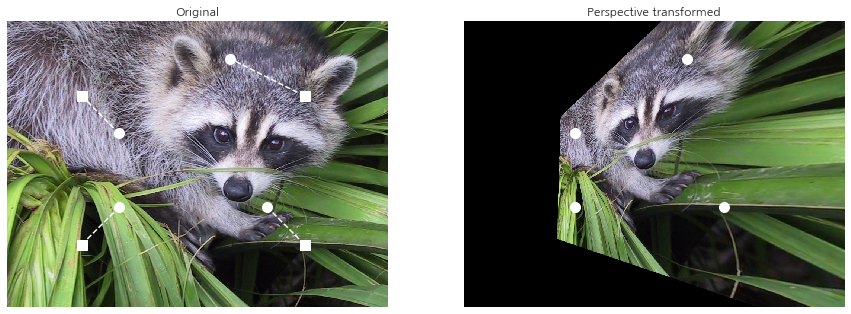

In [32]:
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))
pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker='s')
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()

### Practice 1

다음 왼쪽 이미지를 원근변환하여 오른쪽 이미지와 같이 펼쳐라. 이미지는 다음 명령으로 내려받는다.

In [33]:
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png

--2019-08-21 20:25:32--  https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png
Resolving datascienceschool.net... 114.202.2.86
Connecting to datascienceschool.net|114.202.2.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2731251 (2.6M) [image/png]
Saving to: ‘receipt.png’

receipt.png         100%[===================>]   2.60M  2.17MB/s    in 1.2s    

2019-08-21 20:25:34 (2.17 MB/s) - ‘receipt.png’ saved [2731251/2731251]



In [38]:
img = cv2.imread("./receipt.png")
img.shape

(1578, 1184, 3)

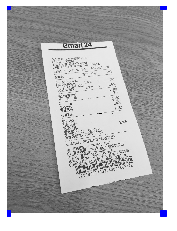

In [60]:
# 원본 데이터를 그레이 색공간으로 변환
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

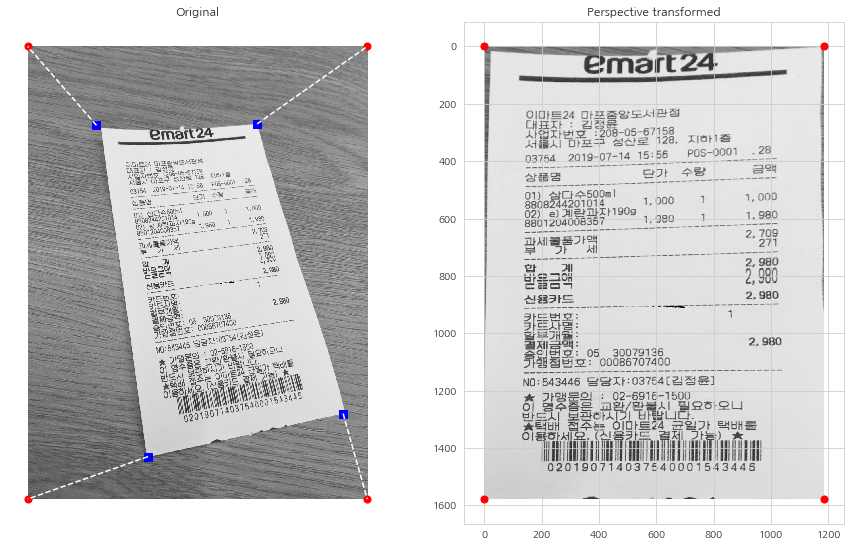

In [107]:
# 4개 점 쌍 구하기
pts2 = np.float32([[0, 0], [0, 1578], [1184, 0], [1184, 1578]])
pts1 = np.float32([[240, 275], [420, 1430], [800, 270], [1100, 1280]])

rows, cols = img_gray.shape

# 사영행렬 구하기
H_perspective = cv2.getPerspectiveTransform(pts1, pts2)

# 사영행렬로 변환
img_gray2 = cv2.warpPerspective(img_gray, H_perspective, (cols, rows))


fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title('Original')
ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.scatter(pts_x, pts_y, c='b', s=50, marker='s')
ax1.scatter(pts_x_, pts_y_, c='r', s=50)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Perspective transformed")
ax2.imshow(img_gray2, cmap=plt.cm.gray)
ax2.scatter(pts_x_, pts_y_, c='r', s=50)
ax1.axis("off")
plt.show()
